In [1]:
import pandas as pd
import glob
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path = f'../ExperimentRecordings/0_sim_high_mu_preprocessed/*.csv'
path = f'../ExperimentRecordings/1_sim_ramp_preprocessed/*.csv'
files = glob.glob(path)
files

['../ExperimentRecordings/1_sim_ramp_preprocessed/F1TENTH_Blank-MPPI-1__2023-09-12_20-37-12.csv',
 '../ExperimentRecordings/1_sim_ramp_preprocessed/F1TENTH_Blank-MPPI-1__2023-09-12_20-40-37.csv',
 '../ExperimentRecordings/1_sim_ramp_preprocessed/F1TENTH_Blank-MPPI-1__2023-09-12_20-38-03.csv',
 '../ExperimentRecordings/1_sim_ramp_preprocessed/F1TENTH_Blank-MPPI-1__2023-09-12_20-38-54.csv',
 '../ExperimentRecordings/1_sim_ramp_preprocessed/F1TENTH_Blank-MPPI-1__2023-09-12_20-39-20.csv',
 '../ExperimentRecordings/1_sim_ramp_preprocessed/F1TENTH_Blank-MPPI-1__2023-09-12_20-38-29.csv',
 '../ExperimentRecordings/1_sim_ramp_preprocessed/F1TENTH_Blank-MPPI-1__2023-09-12_20-39-46.csv',
 '../ExperimentRecordings/1_sim_ramp_preprocessed/F1TENTH_Blank-MPPI-1__2023-09-12_20-40-11.csv',
 '../ExperimentRecordings/1_sim_ramp_preprocessed/F1TENTH_Blank-MPPI-1__2023-09-12_20-37-37.csv',
 '../ExperimentRecordings/1_sim_ramp_preprocessed/F1TENTH_Blank-MPPI-1__2023-09-12_20-36-46.csv']

In [3]:
dfs = []
for file in files:
    dfs.append(pd.read_csv(file, skiprows=8))
frame = pd.concat(dfs, axis=0, ignore_index=True)
exclude = ['WYPT', 'LIDAR', 'linear_vel_y', 'mu', 'pose_theta_']
frame = frame[[col for col in frame.columns if not any(tmp in col for tmp in exclude)]]
frame.describe()

,time,translational_control_applied,angular_control_applied,translational_control,angular_control,pose_x,pose_y,pose_theta,linear_vel_x,angular_vel_z,slip_angle,steering_angle,D_pose_x,D_pose_y,D_pose_theta,D_linear_vel_x,D_angular_vel_z,D_slip_angle,D_steering_angle,experiment_index
count,99980.000000,99980.000000,99980.000000,99980.000000,99980.000000,99980.000000,99980.000000,99980.000000,99980.000000,99980.000000,99980.000000,99980.000000,99980.000000,99980.000000,99980.000000,99980.000000,99980.000000,99980.000000,99980.000000,99980.0
mean,199.980000,3.499750,0.002645,3.499750,0.002645,552.558588,530.125196,0.050824,3.496446,0.025082,-0.000491,0.002973,0.054036,0.107853,0.001489,0.014994,0.001459,-0.000014,0.000107,0.0
std,115.447537,1.443094,0.241682,1.443094,0.241682,114.268072,109.027704,1.707655,1.444115,1.012515,0.052899,0.117440,2.712008,2.633874,10.931811,0.076142,11.837192,0.466906,2.261821,0.0
min,0.040000,1.000500,-0.418900,1.000500,-0.418900,243.801090,293.014770,-3.141540,0.036040,-4.106170,-0.317810,-0.358590,-5.961832,-5.998473,-157.008000,0.012490,-43.493206,-2.279513,-3.201759,0.0
25%,100.000000,2.250000,-0.206340,2.250000,-0.206340,490.943163,456.646635,-1.344120,2.247230,-0.593612,-0.024630,-0.080850,-2.112992,-1.954216,-0.592874,0.012499,-7.582403,-0.283744,-2.110126,0.0
50%,199.980000,3.499750,0.003390,3.499750,0.003390,552.296750,505.658160,0.165380,3.496980,0.023585,0.000000,0.003335,0.608812,0.251770,0.024493,0.012501,0.015750,-0.000250,0.005749,0.0
75%,299.960000,4.749500,0.212533,4.749500,0.212533,626.033550,610.869185,1.343482,4.746730,0.646100,0.023930,0.087320,1.829138,1.993898,0.645610,0.012502,7.574979,0.279440,2.112354,0.0
max,399.920000,5.999000,0.418900,5.999000,0.418900,880.697200,773.422670,3.141550,5.996230,4.263220,0.322060,0.351500,5.996946,5.978626,157.012200,4.345000,42.286728,2.391239,3.201759,0.0


In [4]:
# for df in dfs:
#     print(df.groupby('experiment_index').size())

# Some Plots

<AxesSubplot:>

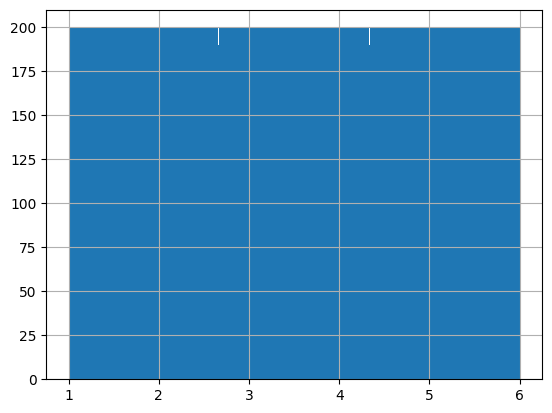

In [5]:
frame.translational_control.hist(bins=500)

<AxesSubplot:>

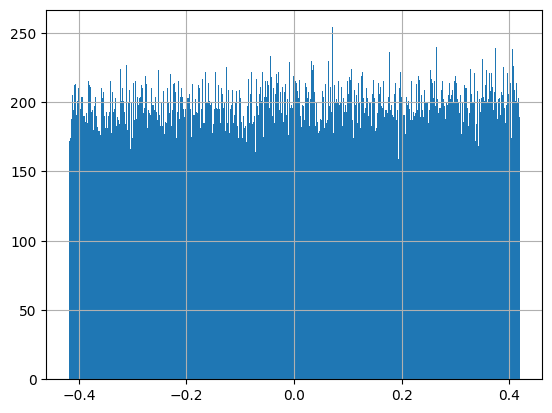

In [6]:
frame.angular_control.hist(bins=500)

<AxesSubplot:>

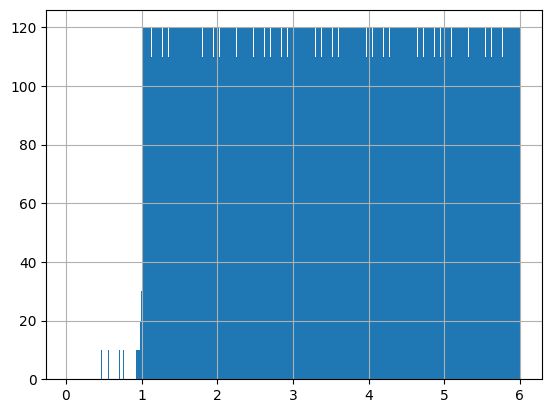

In [7]:
frame.linear_vel_x.hist(bins=1000)

<AxesSubplot:>

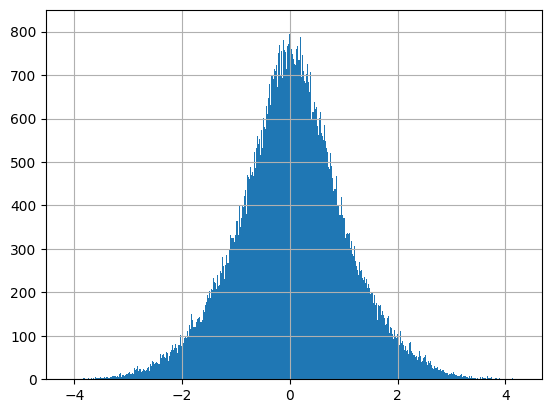

In [8]:
frame.angular_vel_z.hist(bins=500)

<AxesSubplot:>

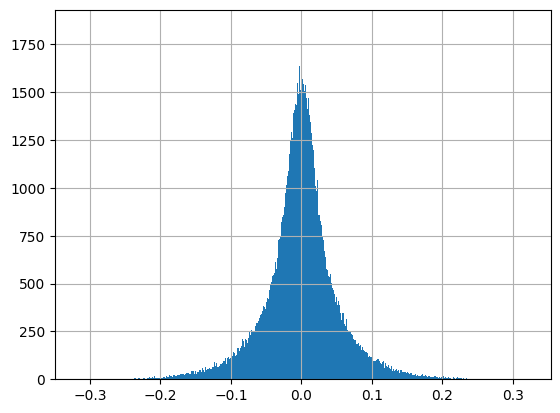

In [9]:
frame.slip_angle.hist(bins=500)

## Delta values

<AxesSubplot:>

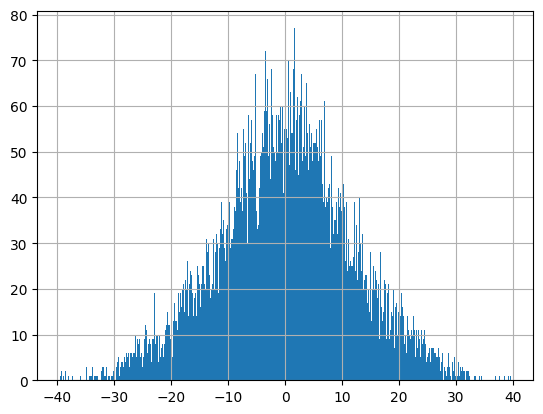

In [164]:
frame.D_angular_vel_z.hist(bins=500)

<AxesSubplot:>

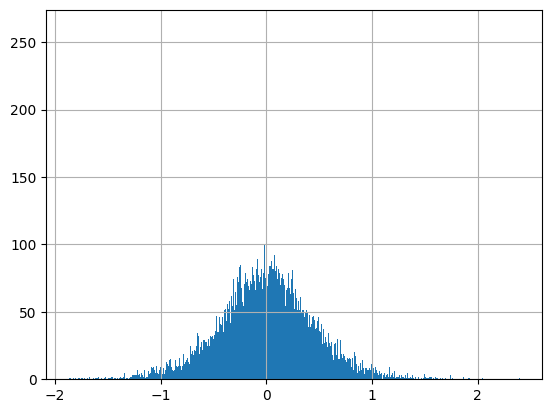

In [165]:
frame.D_slip_angle.hist(bins=500)

<AxesSubplot:>

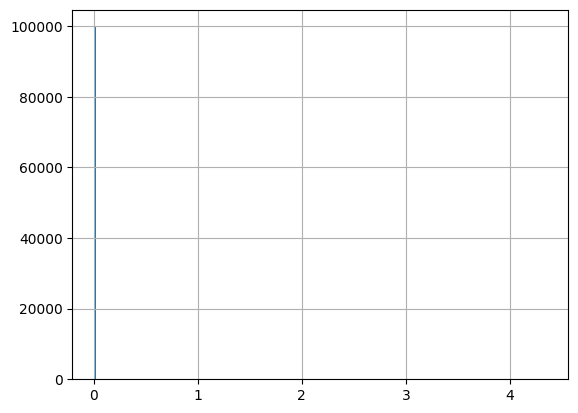

In [10]:
frame.D_linear_vel_x.hist(bins=500)

# Explore controls
Problem: Translational control does not follow a uniform distribution? 
    --> There is an average filter in car_system.py, process_observation()
    --> This is set using control_average_window setting in Settings.py (default (2, 2))

In [70]:
value_history = np.zeros(1)
value_log = []
for _ in range(100000):
    value = random.uniform(0, 20)
    value_history = np.append(value_history, value)[1:]
    value_log.append(np.average(value_history))

In [71]:
# plt.hist(value_log, bins=500);

# Explore angular velocity & slip angle
Having this high values for angular velocity and slip angle fucks up the normalization.

In [57]:
print(len(frame[frame.D_angular_vel_z > 500]))
frame[frame.D_angular_vel_z > 500]

AttributeError: 'DataFrame' object has no attribute 'D_angular_vel_z'

In [58]:
frame[frame.slip_angle > 3.2]

,time,translational_control_applied,angular_control_applied,translational_control,angular_control,pose_x,pose_y,pose_theta,linear_vel_x,angular_vel_z,slip_angle,steering_angle
31830,73.20,12.64529,-0.22442,12.64529,-0.22442,459.17351,515.10292,0.53146,8.14517,-41.67992,3.51187,-0.04666
31831,73.24,14.37803,0.09086,14.37803,0.09086,458.90334,514.93001,-0.33477,8.46433,6.44961,3.51514,-0.11776
68871,354.84,11.21858,-0.26191,11.21858,-0.26191,710.78660,566.33433,-1.27104,8.12039,-26.66066,3.59426,0.03722
73718,148.72,2.02071,0.24843,2.02071,0.24843,530.02024,336.84994,-2.32184,8.89009,1.08865,3.23163,0.17349
94856,194.24,15.75670,0.35809,15.75670,0.35809,569.04706,122.44671,-1.78132,9.06519,-45.34177,3.90807,0.05888
94857,194.28,15.44916,0.41251,15.44916,0.41251,568.96544,122.79361,-2.76822,9.35275,5.46934,4.04193,0.17857


<AxesSubplot:xlabel='pose_x'>

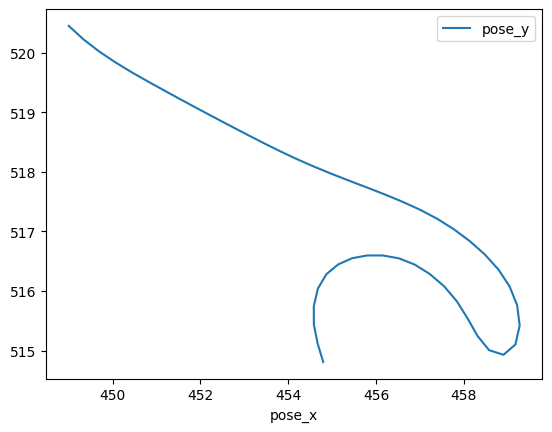

In [59]:
frame.iloc[31800:31850].plot(x='pose_x', y='pose_y')